# 

In [60]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline

In [4]:
import pandas as pd
churn = pd.read_csv("../data/churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [10]:
churn['Churn'].value_counts()
# Its a balanced Dataset

Churn
0    2850
1    2850
Name: count, dtype: int64

In [12]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

In [17]:
from sklearn.model_selection import train_test_split

In [23]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv,y_tr_cv, test_size=0.25, random_state=1)
X_train.shape

(3420, 5)

###  standardization of the data

In [25]:
from sklearn.preprocessing import StandardScaler

In [28]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_val = scalar.transform(X_val)
X_test = scalar.transform(X_test)

In [30]:
X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

### Model

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
model.coef_, model.intercept_

(array([[0.6844725 , 0.29104522, 0.13637423, 0.79640697, 0.0613349 ]]),
 array([-0.01215015]))

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Lets do some predictions

In [41]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
y_train

571     0
83      0
2806    0
4534    1
5653    1
       ..
628     0
4145    1
4914    1
4473    1
4828    1
Name: Churn, Length: 3420, dtype: int64

In [47]:
def accuracy(y_true, y_pred):
    return np.sum(y_true==y_pred)/y_true.shape[0]

In [50]:
# accuray on train data 
accuracy(y_train, model.predict(X_train))

0.7058479532163743

In [52]:
# accuracy on validatatino set 
accuracy(y_val, model.predict(X_val))

0.6982456140350877

In [54]:
# more or less same -> not a overfitted model

###  Hyperparameter tuning



Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Hence let's start doing hyper parameter tuning on parameter $C = \frac{1}{\lambda}$  to increase the performance of the model

In [70]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scalar = StandardScaler()
for la in np.arange(0.01, 5000, 100) : # range of lambda 
    scaled_lr = make_pipeline(scalar, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = accuracy(y_train, scaled_lr.predict(X_train))
    val_score = accuracy(y_val, scaled_lr.predict(X_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

Now, let's plot the graph and pick the Regularization Parameter  λ  which gives the best validation score

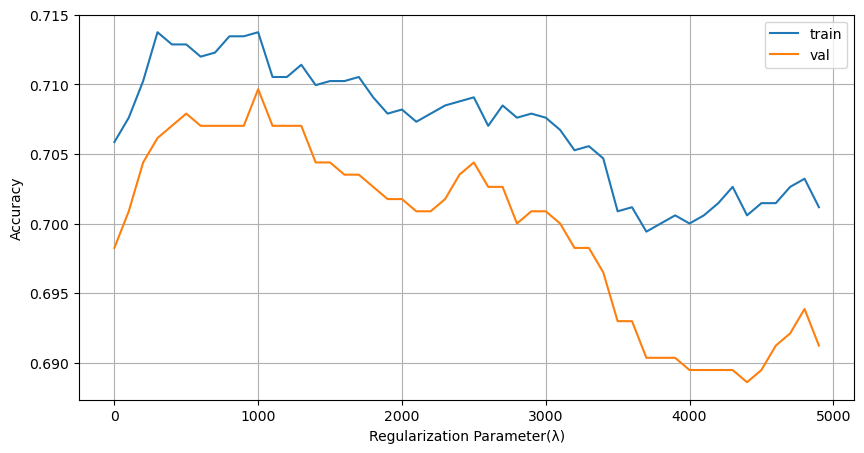

In [80]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000, 100)), train_scores, label='train')
plt.plot(list(np.arange(0.01, 5000, 100)), val_scores, label='val')
plt.legend(loc='upper right')
plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

* We see how Validation increases to a peak and then decreases

* Notice as Regularization is increasing, the Accuracy decreasing since model is moving towards Underfit

In [83]:
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [87]:
print("train accuracy = ",accuracy(y_train, model.predict(X_train)))
print("val accuracy = ", accuracy(y_val, model.predict(X_val)))

train accuracy =  0.7137426900584796
val accuracy =  0.7096491228070175


Now model for test 

In [89]:
print("test accuracy = ", accuracy(y_test, model.predict(X_test)))

test accuracy =  0.7096491228070175
